In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Read in dataset
avocados = pd.read_csv("avocados.csv")
avocados.head()

,Date,Average Price,Total Volume
0,2015-12-27,1.05,692206.40
1,2015-12-20,1.15,637091.48
2,2015-12-13,1.22,616016.46
3,2015-12-06,1.06,694982.49
4,2015-11-29,1.05,651638.60


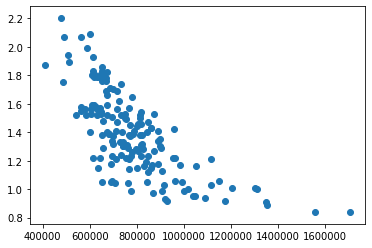

In [3]:
# Plot
plt.scatter(avocados["Total Volume"], avocados["Average Price"])

In [7]:
# single variable regression
X = sm.add_constant(avocados["Average Price"])
y = avocados["Total Volume"]
model = sm.OLS(y, X, cov_type='HC1')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total Volume   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     180.7
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           2.16e-28
Time:                        15:01:53   Log-Likelihood:                -2232.2
No. Observations:                 169   AIC:                             4468.
Df Residuals:                     167   BIC:                             4475.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.447e+06   5.06e+04     28.622      0.000    1.35e+06    1.55e+06
Average Price -4.764e+05   3.54e+04    -13.443      0.000   -5.46e+05   -4.06e+05
==============================================================================
Omnibus:                       50.900   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.997
Skew:                           1.161   Prob(JB):                     4.03e-36
Kurtosis:                       7.213   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

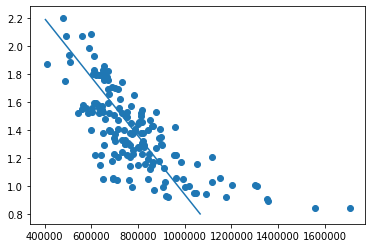

In [14]:
# Plotting single variable regression
intercept = results.params['const']
slope = results.params['Average Price']

prices = np.arange(0.8, 2.2, 0.01) # Create an array of prices
quantities = slope*prices + intercept

plt.scatter(avocados["Total Volume"], avocados["Average Price"])
plt.plot(quantities, prices)